In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from vega_datasets import data
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_df.csv')

In [3]:
def set_date(df):
    df.sale_date = pd.to_datetime(df.sale_date)

    df = df.set_index('sale_date').sort_index()

    df['day_of_week'] = df.index.strftime('%A')

    df['month'] = df.index.strftime('%B')

    df['sales_total'] = df.sale_amount * df.item_price

    return df

In [4]:
df = set_date(df)

In [5]:
df.head()

,Unnamed: 0,sale_amount,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Tuesday,January,10.92
2013-01-01 00:00:00+00:00,211816,26.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,January,218.40
2013-01-01 00:00:00+00:00,832656,27.0,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,San Antonio,TX,78217,Tuesday,January,125.55
2013-01-01 00:00:00+00:00,213642,54.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,San Antonio,TX,78232,Tuesday,January,453.60
2013-01-01 00:00:00+00:00,215468,35.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,San Antonio,TX,78221,Tuesday,January,294.00


In [6]:
train = df.loc[:'2016']
test = df.loc['2017']

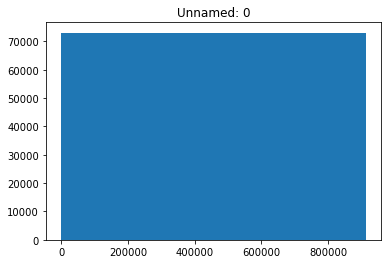

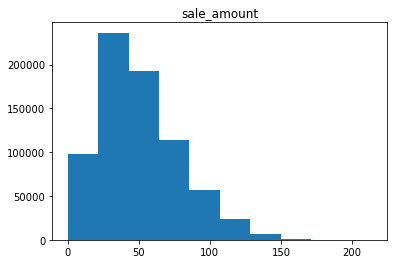

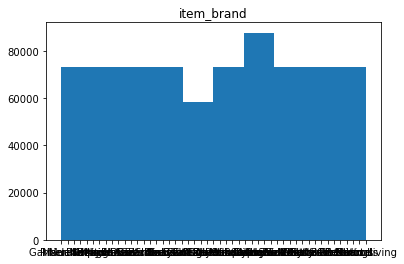

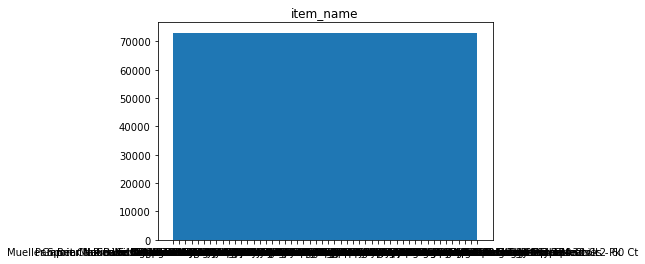

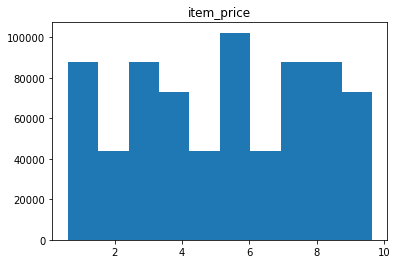

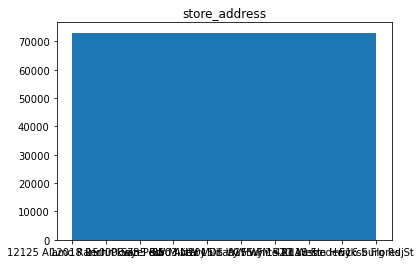

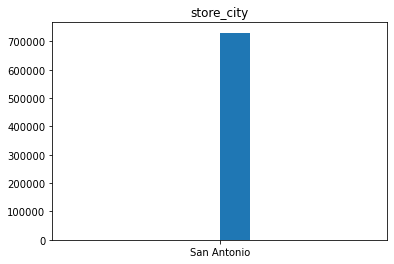

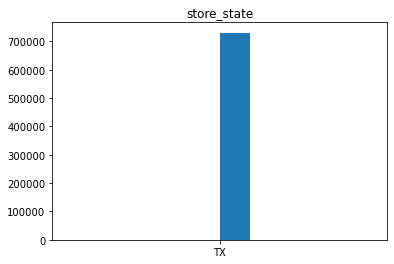

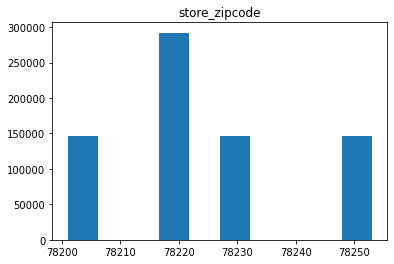

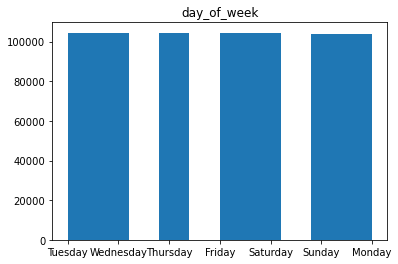

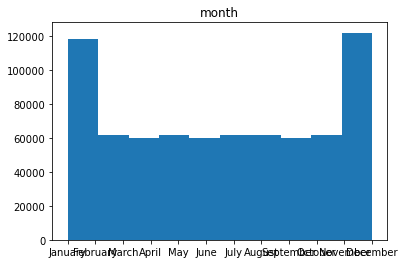

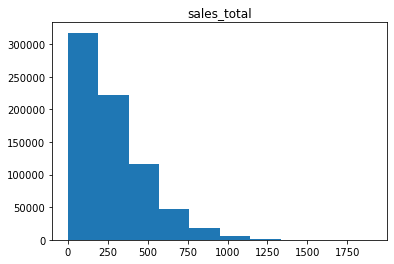

In [7]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='sale_date'>

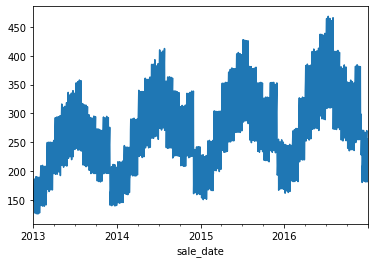

In [8]:
total_by_day = train.resample('D').sales_total.mean()
total_by_day.plot()


<AxesSubplot:xlabel='sale_date'>

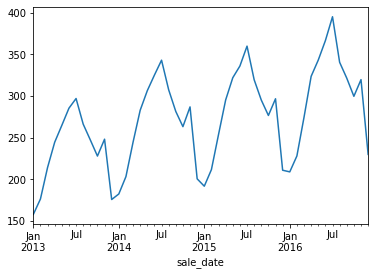

In [9]:
total_by_month = train.resample('M').sales_total.mean()
total_by_month.plot()

<AxesSubplot:xlabel='sale_date'>

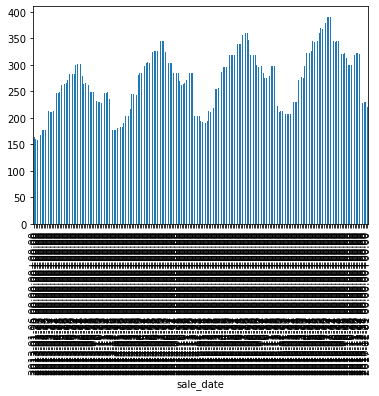

In [10]:
total_by_weekly = train.resample('W').sales_total.mean()
total_by_weekly.plot.bar()

<AxesSubplot:xlabel='sale_date'>

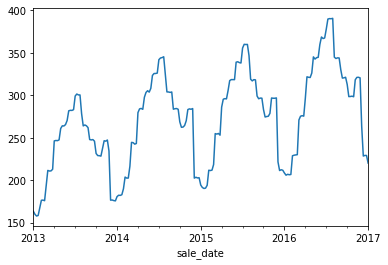

In [19]:
total_by_weekly.plot()

<AxesSubplot:xlabel='month'>

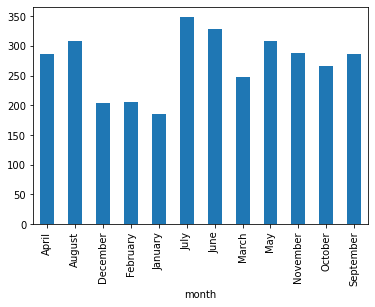

In [11]:
train.groupby('month').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='item_brand'>

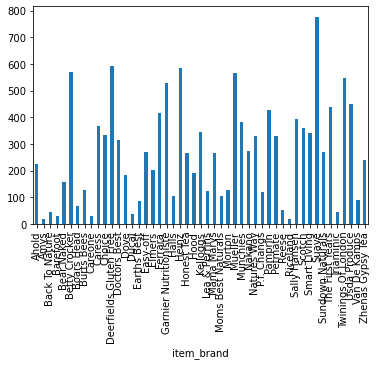

In [12]:
train.groupby('item_brand').sales_total.mean().plot.bar()

<AxesSubplot:xlabel='store_zipcode'>

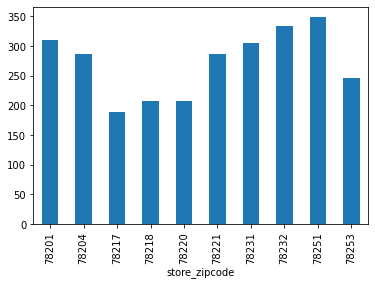

In [13]:
train.groupby('store_zipcode').sales_total.mean().plot.bar()

In [14]:
#Take the aggregate min and max for daily temperature
minmax_df = train.resample('D').sales_total.agg(['min', 'max'])
#Calculate the change
minmax_df['change'] = minmax_df['max'] - minmax_df['min']
minmax_df.head()

,min,max,change
sale_date,,,
2013-01-01 00:00:00+00:00,4.44,592.15,587.71
2013-01-02 00:00:00+00:00,3.36,646.81,643.45
2013-01-03 00:00:00+00:00,6.72,610.37,603.65
2013-01-04 00:00:00+00:00,4.20,619.48,615.28
2013-01-05 00:00:00+00:00,5.40,756.13,750.73


<AxesSubplot:xlabel='sale_date'>

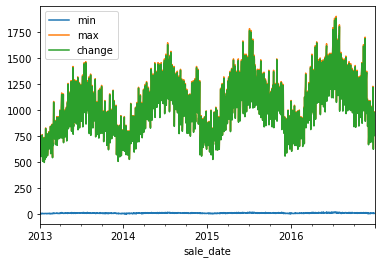

In [25]:
minmax_df.plot()

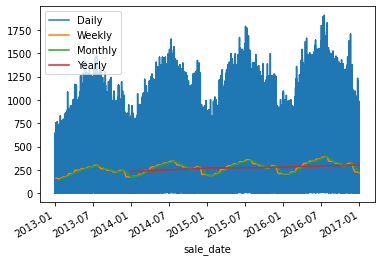

In [15]:
train.sales_total.plot(label='Daily')
train.resample('W').mean().sales_total.plot(label='Weekly')
train.resample('M').mean().sales_total.plot(label='Monthly')
train.resample('Y').mean().sales_total.plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

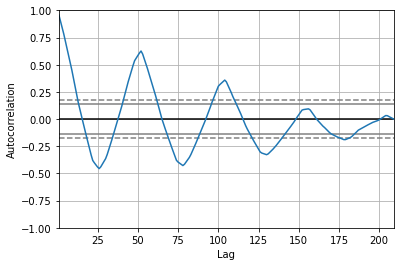

In [16]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

<AxesSubplot:xlabel='sale_date'>

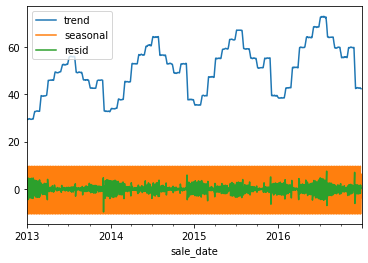

In [17]:
y = train.sale_amount.resample('D').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='sale_date'>

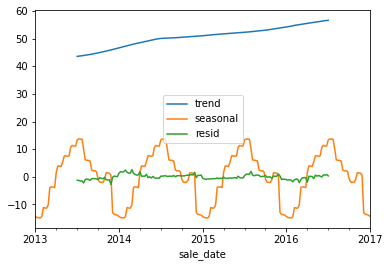

In [18]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='sale_date'>

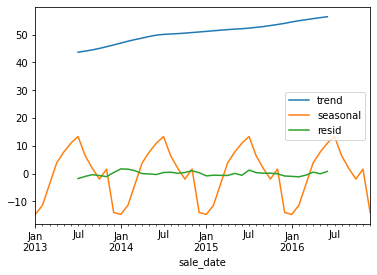

In [19]:
y = train.sale_amount.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

<AxesSubplot:title={'center':'Week to week sale date and mean'}, xlabel='sale_date'>

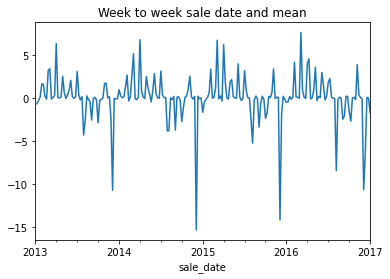

In [41]:
y.reset_index()
y.resample('W').mean().diff().plot(title='Week to week sale date and mean')


<AxesSubplot:title={'center':'Year to Year sale date and mean'}, xlabel='sale_date'>

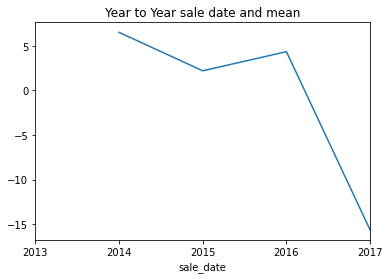

In [40]:
y.resample('Y').mean().diff().plot(title='Year to Year sale date and mean')

In [42]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.datetime.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)



SyntaxError: invalid syntax (680972308.py, line 7)

In [ ]:
<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

#
---
Power

In [2]:
power = pd.read_csv('power.csv')

In [3]:
power.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
def power_date(df):
    df.Date = pd.to_datetime(df.Date)

    df = df.set_index('Date').sort_index()

    df['day_of_week'] = df.index.strftime('%A')

    df['month'] = df.index.strftime('%B')

    df = df.fillna('0')

    df = df.drop(columns='Unnamed: 0')

    df.columns = [col.replace('+','_').lower() for col in df.columns]

    return df

In [5]:
power = power_date(power)

In [6]:
train = power.loc[:'2015']
test = power.loc['2016':]

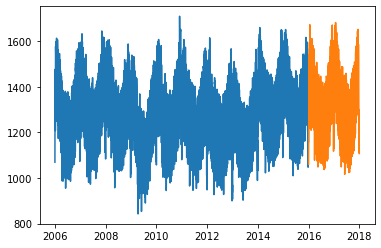

In [8]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

<AxesSubplot:xlabel='Date'>

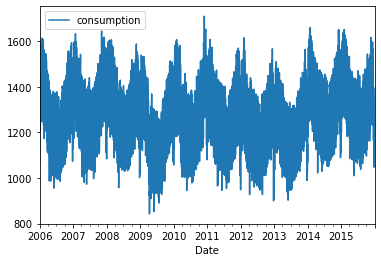

In [10]:
train.plot()

In [ ]:
train.Consumption.plot(label='Weekly')
train.resample('W').mean().sales_total.plot(label='Weekly')
train.resample('W').mean().sales_total.plot(label='Monthly')
train.resample('W').mean().sales_total.plot(label='Yearly')
plt.legend()
plt.show()